In [1]:
from matplotlib import pyplot as plt
from datasets import get_dataset_config_names
from datasets import load_dataset
import pandas as pd

/home/nebiyu/miniconda3/envs/tunning/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
domains=get_dataset_config_names("subjqa")
domains

['books', 'electronics', 'grocery', 'movies', 'restaurants', 'tripadvisor']

In [3]:
subjqa=load_dataset("subjqa",name="electronics")

In [4]:
subjqa

DatasetDict({
    train: Dataset({
        features: ['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answers'],
        num_rows: 1295
    })
    test: Dataset({
        features: ['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answers'],
        num_rows: 358
    })
    validation: Dataset({
        features: ['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answers'],
        num_rows: 255
    })
})

In [5]:
print(subjqa["train"][1].keys())

dict_keys(['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answers'])


In [6]:
print(subjqa["train"][1]["question"])

Is this music song have a goo bass?


In [7]:
print(subjqa["train"][1]["answers"])

{'text': ['Bass is weak as expected', 'Bass is weak as expected, even with EQ adjusted up'], 'answer_start': [1302, 1302], 'answer_subj_level': [1, 1], 'ans_subj_score': [0.5083333253860474, 0.5083333253860474], 'is_ans_subjective': [True, True]}


In [8]:
print(subjqa["train"]["answers"][1].keys())

dict_keys(['text', 'answer_start', 'answer_subj_level', 'ans_subj_score', 'is_ans_subjective'])


# turn the data into dataframe

In [9]:
dfs={label:data.to_pandas() for label,data in subjqa.flatten().items()}

In [10]:
1295+358+255

1908

In [11]:
type(dfs)

dict

In [12]:
for split,df in dfs.items():
    print(f"{split} has {len(df)} number of elements")

train has 1295 number of elements
test has 358 number of elements
validation has 255 number of elements


In [13]:
qa_columns=["title","question","answers.text","answers.answer_start","context"]

sample=dfs["train"][qa_columns].sample(2,random_state=7)

In [14]:
sample

,title,question,answers.text,answers.answer_start,context
791,B005DKZTMG,Does the keyboard lightweight?,[this keyboard is compact],[215],I really like this keyboard. I give it 4 star...
1159,B00AAIPT76,How is the battery?,[],[],I bought this after the first spare gopro batt...


In [15]:
#lets extracte the text 
start_index=sample["answers.answer_start"].iloc[0][0]
end_index=start_index+len(sample["answers.text"].iloc[0][0])

In [16]:
sample["context"].iloc[0][start_index:end_index]

'this keyboard is compact'

In [17]:
end_index,start_index

(239, 215)

In [18]:
sample['context'].iloc[0]

"I really like this keyboard.  I give it 4 stars because it doesn't have a CAPS LOCK key so I never know if my caps are on.  But for the price, it really suffices as a wireless keyboard.  I have very large hands and this keyboard is compact, but I have no complaints."

In [19]:
dfs["train"].head()

,domain,nn_mod,nn_asp,query_mod,query_asp,q_reviews_id,question_subj_level,ques_subj_score,is_ques_subjective,review_id,id,title,context,question,answers.text,answers.answer_start,answers.answer_subj_level,answers.ans_subj_score,answers.is_ans_subjective
0,electronics,great,bass response,excellent,bass,0514ee34b672623dff659334a25b599b,5,0.50,False,882b1e2745a4779c8f17b3d4406b91c7,2543d296da9766d8d17d040ecc781699,B00001P4ZH,"I have had Koss headphones in the past, Pro 4A...",How is the bass?,[],[],[],[],[]
1,electronics,harsh,high,not strong,bass,7c46670208f7bf5497480fbdbb44561a,1,0.50,False,ce76793f036494eabe07b33a9a67288a,d476830bf9282e2b9033e2bb44bbb995,B00001P4ZH,To anyone who hasn't tried all the various typ...,Is this music song have a goo bass?,"[Bass is weak as expected, Bass is weak as exp...","[1302, 1302]","[1, 1]","[0.5083333, 0.5083333]","[True, True]"
2,electronics,neutral,sound,present,bass,8fbf26792c438aa83178c2d507af5d77,1,0.50,False,d040f2713caa2aff0ce95affb40e12c2,455575557886d6dfeea5aa19577e5de4,B00001P4ZH,I have had many sub-$100 headphones from $5 Pa...,How is the bass?,[The only fault in the sound is the bass],[650],[2],[0.6333333],[True]
3,electronics,muddy,bass,awesome,bass,9876fd06ed8f075fcad70d1e30e7e8be,1,0.50,False,043e7162df91f6ea916c790c8a6f6b22,6895a59b470d8feee0f39da6c53a92e5,B00001WRSJ,My sister's Bose headphones finally died and s...,How is the audio bass?,[the best of all of them],[1609],[1],[0.3],[False]
4,electronics,perfect,bass,incredible,sound,16506b53e2d4c2b6a65881d9462256c2,1,0.65,True,29ccd7e690050e2951be49289e915382,7a2173c502da97c5bd5950eae7cd7430,B00001WRSJ,Wow. Just wow. I'm a 22 yr old with a crazy ob...,Why do I have an incredible sound?,"[The sound is so crisp, crazy obsession with s...","[141, 38]","[1, 1]","[0.40833333, 0.40833333]","[False, False]"


# count question that start with certain phrases

In [20]:
counts = {}
question_types = ["What", "How", "Is", "Does", "Do", "Was", "Where", "Why"]

In [21]:
for q in question_types:
    counts[q]=dfs["train"]["question"].str.startswith(q).value_counts()[True]

## ploting 

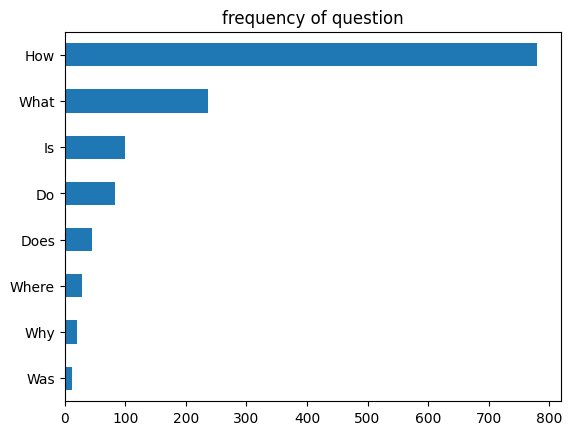

In [22]:
pd.Series(counts).sort_values().plot.barh()
plt.title("frequency of question")
plt.show()

In [23]:
few_question=["How","What","Is"]

for questions in few_question:
    for question in (dfs["train"][dfs["train"].question.str.startswith(questions)].sample(n=3,random_state=42)['question']):
        print(question)

How is the camera?
How do you like the control?
How fast is the charger?
What is direction?
What is the quality of the construction of the bag?
What is your impression of the product?
Is this how zoom works?
Is sound clear?
Is it a wireless keyboard?


# lets load the model

In [24]:
from transformers import AutoTokenizer

In [25]:
model_name="deepset/minilm-uncased-squad2"
tokenizer=AutoTokenizer.from_pretrained(model_name)

/home/nebiyu/miniconda3/envs/tunning/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [26]:
import torch

In [27]:
question = "How much music can this hold?"
context = """An MP3 is about 1 MB/minute, so about 6000 hours depending on \
file size."""

inputs=tokenizer(question,context,return_tensors="pt")

In [28]:
inputs

{'input_ids': tensor([[  101,  2129,  2172,  2189,  2064,  2023,  2907,  1029,   102,  2019,
         23378,  2003,  2055,  1015, 16914,  1013,  3371,  1010,  2061,  2055,
         25961,  2847,  5834,  2006,  5371,  2946,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1]])}

In [29]:
tokenizer.decode(inputs["input_ids"][0])

'[CLS] how much music can this hold? [SEP] an mp3 is about 1 mb / minute, so about 6000 hours depending on file size. [SEP]'

In [30]:
tokenizer.decode(inputs["input_ids"][0])

'[CLS] how much music can this hold? [SEP] an mp3 is about 1 mb / minute, so about 6000 hours depending on file size. [SEP]'

# pass input to the model

In [31]:
import torch
from transformers import AutoModelForQuestionAnswering

In [32]:
model=AutoModelForQuestionAnswering.from_pretrained(model_name)

Some weights of the model checkpoint at deepset/minilm-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [33]:
##pass the inputs
with torch.no_grad():
    outputs=model(**inputs)

print(outputs)

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[-0.9862, -4.7750, -5.4025, -5.2378, -5.2863, -5.5117, -4.9819, -6.1880,
         -0.9862,  0.2596, -0.2144, -1.7136,  3.7806,  4.8561, -1.0546, -3.9097,
         -1.7374, -4.5944, -1.4278,  3.9949,  5.0391, -0.2018, -3.0193, -4.8549,
         -2.3107, -3.5110, -3.5713, -0.9862]]), end_logits=tensor([[-0.9623, -5.4733, -5.0326, -5.1639, -5.4278, -5.5151, -5.1749, -4.6233,
         -0.9623, -3.7855, -0.8715, -3.7745, -3.0162, -1.1780,  0.1758, -2.7365,
          4.8934,  0.3046, -3.1761, -3.2762,  0.8937,  5.6606, -0.3623, -4.9554,
         -3.2531, -0.0914,  1.6211, -0.9623]]), hidden_states=None, attentions=None)


In [34]:
#we get the start and end token
start_logits=outputs.start_logits
end_logits=outputs.end_logits

In [35]:
print(start_logits.shape)
print(end_logits.shape)
print(inputs['input_ids'].shape)

torch.Size([1, 28])
torch.Size([1, 28])
torch.Size([1, 28])


In [36]:
print(start_logits)
print()
print(end_logits)

tensor([[-0.9862, -4.7750, -5.4025, -5.2378, -5.2863, -5.5117, -4.9819, -6.1880,
         -0.9862,  0.2596, -0.2144, -1.7136,  3.7806,  4.8561, -1.0546, -3.9097,
         -1.7374, -4.5944, -1.4278,  3.9949,  5.0391, -0.2018, -3.0193, -4.8549,
         -2.3107, -3.5110, -3.5713, -0.9862]])

tensor([[-0.9623, -5.4733, -5.0326, -5.1639, -5.4278, -5.5151, -5.1749, -4.6233,
         -0.9623, -3.7855, -0.8715, -3.7745, -3.0162, -1.1780,  0.1758, -2.7365,
          4.8934,  0.3046, -3.1761, -3.2762,  0.8937,  5.6606, -0.3623, -4.9554,
         -3.2531, -0.0914,  1.6211, -0.9623]])


## extract answer

In [37]:
start_idx=torch.argmax(start_logits)
end_idx=torch.argmax(end_logits)+1
answer_span=inputs['input_ids'][0][start_idx:end_idx]
answer=tokenizer.decode(answer_span)

print(f'question is {question}')
print(f'answer is {answer}')

question is How much music can this hold?
answer is 6000 hours


# automate it with piepline

In [38]:
from transformers import pipeline

In [39]:
pipe=pipeline("question-answering",model=model,tokenizer=tokenizer)

In [40]:
pipe(question=question,context=context,top_k=3)

[{'score': 0.2651619017124176, 'start': 38, 'end': 48, 'answer': '6000 hours'},
 {'score': 0.22082971036434174,
  'start': 16,
  'end': 48,
  'answer': '1 MB/minute, so about 6000 hours'},
 {'score': 0.10253506153821945,
  'start': 16,
  'end': 27,
  'answer': '1 MB/minute'}]

# more context size than model can handlem

In [41]:
example=dfs['train'].iloc[0][['question','context']]

In [42]:
tokenized_example=tokenizer(example['question'],example['context'],
                           return_overflowing_tokens=True,max_length=100,stride=25
                           )

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [43]:
tokenized_example

{'input_ids': [[101, 2129, 2003, 1996, 3321, 1029, 102, 1045, 2031, 2018, 12849, 4757, 2132, 19093, 1999, 1996, 2627, 1010, 4013, 26424, 2050, 1998, 1053, 2480, 1011, 5585, 1012, 1996, 12849, 4757, 3417, 9331, 3217, 2003, 12109, 1998, 2038, 2307, 3321, 3433, 1012, 1996, 2147, 2307, 2007, 2026, 11924, 3042, 1998, 2064, 2022, 1000, 4565, 2039, 1000, 2000, 2022, 3344, 1999, 2026, 9055, 6598, 2030, 3274, 4524, 2302, 2893, 24514, 2098, 1012, 2027, 2024, 2200, 2422, 1998, 2079, 2025, 2514, 3082, 2030, 4562, 2091, 2006, 2115, 5551, 2130, 2044, 5962, 2000, 2189, 2007, 2068, 2006, 2035, 2154, 1012, 1996, 2614, 2003, 102], [101, 2129, 2003, 1996, 3321, 1029, 102, 1998, 2079, 2025, 2514, 3082, 2030, 4562, 2091, 2006, 2115, 5551, 2130, 2044, 5962, 2000, 2189, 2007, 2068, 2006, 2035, 2154, 1012, 1996, 2614, 2003, 2305, 1998, 2154, 2488, 2084, 2151, 4540, 1011, 13007, 2071, 2022, 1998, 2024, 2471, 2004, 2204, 2004, 1996, 4013, 26424, 2050, 1012, 2027, 2024, 1000, 2330, 2250, 1000, 2132, 19093, 2061,

In [44]:
for idx,tokens in enumerate(tokenized_example['input_ids']):
    print(f"{idx} has {len(tokens)} number of tokens ")

0 has 100 number of tokens 
1 has 88 number of tokens 


In [45]:
for window in tokenized_example['input_ids']:
    print(f"{tokenizer.decode(window)}")

[CLS] how is the bass? [SEP] i have had koss headphones in the past, pro 4aa and qz - 99. the koss portapro is portable and has great bass response. the work great with my android phone and can be " rolled up " to be carried in my motorcycle jacket or computer bag without getting crunched. they are very light and do not feel heavy or bear down on your ears even after listening to music with them on all day. the sound is [SEP]
[CLS] how is the bass? [SEP] and do not feel heavy or bear down on your ears even after listening to music with them on all day. the sound is night and day better than any ear - bud could be and are almost as good as the pro 4aa. they are " open air " headphones so you cannot match the bass to the sealed types, but it comes close. for $ 32, you cannot go wrong. [SEP]


# lets install some stuff

## create a sub process

In [46]:
# import os
# import time
# import requests
# from subprocess import Popen, PIPE, STDOUT

# # Start Elasticsearch Docker container
# docker_command = [
#     'docker', 'run', '-d', '--name', 'elasticsearch',
#     '-p', '9200:9200', '-e', 'discovery.type=single-node',
#     '-e', 'ELASTIC_PASSWORD=peQBjqFfi-FSUMDfjORi',
#     'docker.elastic.co/elasticsearch/elasticsearch:8.15.1'
# ]

# # Start the Docker container
# with Popen(docker_command, stdout=PIPE, stderr=STDOUT) as es_server:
#     # Wait for Elasticsearch to start
#     time.sleep(30)

#     # Check if Elasticsearch is up and running
#     try:
#         response = requests.get("http://localhost:9200/", auth=('elastic', 'peQBjqFfi-FSUMDfjORi'))
#         response.raise_for_status()  # Raise an error for bad responses
#         print("Elasticsearch is running:", response.json())
#     except requests.exceptions.RequestException as e:
#         print("Error connecting to Elasticsearch:", e)


# Docker form

In [47]:
# import docker
# import time
# import requests
# from subprocess import Popen, PIPE, STDOUT

# # Define the path to the Elasticsearch binary
# es_path = '/usr/share/elasticsearch/bin/elasticsearch'  # Update this to the correct path

# # Connect to the Docker daemon
# client = docker.from_env()

# # Start the Elasticsearch container
# container = client.containers.run(
#     image="docker.elastic.co/elasticsearch/elasticsearch:8.15.1",  # Replace with your desired Elasticsearch image
#     detach=True,
#     name="es01"  # Specify the container name
# )

# # Wait for Elasticsearch to start
# time.sleep(30)

# # Check if Elasticsearch is up and running
# try:
#     response = requests.get("http://localhost:9200/", auth=('elastic', '8Ffm8AV5DvjhzB3NsQVY'))  # Update the password
#     response.raise_for_status()  # Raise an error for bad responses
#     print("Elasticsearch is running:", response.json())
# except requests.exceptions.RequestException as e:
#     print("Error connecting to Elasticsearch:", e)

# # Stop the container when finished
# container.stop()

In [48]:
import os
import time
import requests
from subprocess import Popen, PIPE, STDOUT

# Define the path to the Elasticsearch binary
es_path = '/usr/share/elasticsearch/bin/elasticsearch'  # Update this to the correct path

# Change ownership of Elasticsearch files without requiring a password
#os.system('sudo chown -R daemon:daemon /usr/share/elasticsearch/bin/elasticsearch')  # Update this path as well

# Start Elasticsearch server
es_server = Popen(args=[es_path],
                  stdout=PIPE, stderr=STDOUT)

# Wait for Elasticsearch to start
time.sleep(30)

# Check if Elasticsearch is up and running
try:
    response = requests.get("http://localhost:9200/", auth=('elastic', '8Ffm8AV5DvjhzB3NsQVY'))  # Update the password
    response.raise_for_status()  # Raise an error for bad responses
    print("Elasticsearch is running:", response.json())
except requests.exceptions.RequestException as e:
    print("Error connecting to Elasticsearch:", e)

Elasticsearch is running: {'name': '8484cf283848', 'cluster_name': 'docker-cluster', 'cluster_uuid': '4G6Yu1Q5R86hprBmt3km6w', 'version': {'number': '8.15.1', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': '253e8544a65ad44581194068936f2a5d57c2c051', 'build_date': '2024-09-02T22:04:47.310170297Z', 'build_snapshot': False, 'lucene_version': '9.11.1', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'}


In [49]:
new_password="8Ffm8AV5DvjhzB3NsQVY"

In [50]:
!curl -X GET "http://localhost:9200"

{
  "name" : "8484cf283848",
  "cluster_name" : "docker-cluster",
  "cluster_uuid" : "4G6Yu1Q5R86hprBmt3km6w",
  "version" : {
    "number" : "8.15.1",
    "build_flavor" : "default",
    "build_type" : "docker",
    "build_hash" : "253e8544a65ad44581194068936f2a5d57c2c051",
    "build_date" : "2024-09-02T22:04:47.310170297Z",
    "build_snapshot" : false,
    "lucene_version" : "9.11.1",
    "minimum_wire_compatibility_version" : "7.17.0",
    "minimum_index_compatibility_version" : "7.0.0"
  },
  "tagline" : "You Know, for Search"
}


# add the document store

In [51]:
#new_password="peQBjqFfi-FSUMDfjORi"

In [52]:
#!curl -k -u elastic:peQBjqFfi-FSUMDfjORi -X GET "https://localhost:9200/?pretty"

In [53]:
!curl -X GET "localhost:9200/"

{
  "name" : "8484cf283848",
  "cluster_name" : "docker-cluster",
  "cluster_uuid" : "4G6Yu1Q5R86hprBmt3km6w",
  "version" : {
    "number" : "8.15.1",
    "build_flavor" : "default",
    "build_type" : "docker",
    "build_hash" : "253e8544a65ad44581194068936f2a5d57c2c051",
    "build_date" : "2024-09-02T22:04:47.310170297Z",
    "build_snapshot" : false,
    "lucene_version" : "9.11.1",
    "minimum_wire_compatibility_version" : "7.17.0",
    "minimum_index_compatibility_version" : "7.0.0"
  },
  "tagline" : "You Know, for Search"
}


In [54]:
!curl -X GET http://localhost:9200/

{
  "name" : "8484cf283848",
  "cluster_name" : "docker-cluster",
  "cluster_uuid" : "4G6Yu1Q5R86hprBmt3km6w",
  "version" : {
    "number" : "8.15.1",
    "build_flavor" : "default",
    "build_type" : "docker",
    "build_hash" : "253e8544a65ad44581194068936f2a5d57c2c051",
    "build_date" : "2024-09-02T22:04:47.310170297Z",
    "build_snapshot" : false,
    "lucene_version" : "9.11.1",
    "minimum_wire_compatibility_version" : "7.17.0",
    "minimum_index_compatibility_version" : "7.0.0"
  },
  "tagline" : "You Know, for Search"
}


In [55]:
# "https:localhost:9200/" --"insecure"

In [56]:
from haystack.document_stores import ElasticsearchDocumentStore
from haystack import Document

In [57]:
new_document_store=ElasticsearchDocumentStore(
    host="localhost",
    port=9200
)

## saving data in document store

In [58]:
#new_document_store.delete_all_documents()
for split, df in dfs.items():
    docs = [
        Document(content= row["context"],
    meta={"item_id": row["title"], "question_id": row["id"],
            "split": split}
                )
        for _,row in df.drop_duplicates(subset="context").iterrows()]
    new_document_store.write_documents(docs)

In [59]:
document_count = new_document_store.client.count(index='default')["count"]
print(f"Number of documents is {document_count}")

Number of documents is 1875


# initializing retriver

In [60]:
from haystack.nodes import BM25Retriever

retriever = BM25Retriever(new_document_store)

In [86]:
# item_id="B0074BW614"
# query="Is it good for reading?"
# filters = {
#     "operator": "AND",
#     "conditions": [
#         {"field": "meta.item_id", "operator": "==", "value": "B0074BW614"},
#         {"field": "meta.split", "operator": "==", "value": "train"}
#     ]
# }

# retriever_docs=retriever.retrieve(
#     query=query,top_k=3,filters=filters
# )

In [87]:
#updated retriver
ret_doc=retriever.retrieve(
    query=query,top_k=3,filters={"item_id":[item_id],"split":["train"]}
)

In [88]:
#ret_doc

In [89]:
for i, doc in enumerate(ret_doc):
    print(f"Document {i + 1}:")
    print(f"Item ID: {doc.meta['item_id']}")
    print(f"Split: {doc.meta['split']}")
    print(f"Question ID: {doc.meta['question_id']}")
    print(f"Content: {doc.content}")
    print(f"Score:{doc.score} ")
    print("\n")

Document 1:
Item ID: B0074BW614
Split: train
Question ID: 868e311275e26dbafe5af70774a300f3
Content: This is a gift to myself.  I have been a kindle user for 4 years and this is my third one.  I never thought I would want a fire for I mainly use it for book reading.  I decided to try the fire for when I travel I take my laptop, my phone and my iPod classic.  I love my iPod but watching movies on the plane with it can be challenging because it is so small. Laptops battery life is not as good as the Kindle.  So the Fire combines for me what I needed all three to do. So far so good.
Score:0.6857824513476455 


Document 2:
Item ID: B0074BW614
Split: train
Question ID: 998d564607f10bf6dbbd20b33b8fbbf1
Content: Plays Netflix great, WiFi capability has great range. Resolution on the screen is AMAZING! For the price you cannot go wrong. Bought one for my spouse and myself after becoming addicted to hers! Our son LOVES it and it is great for reading books when no light is available. Amazing soun

# initializing a reader

In [110]:
from haystack.nodes import FARMReader

model_="deepset/roberta-base-squad2"
max_seq,doc_stride=384,128

reader=FARMReader(
    "deepset/roberta-base-squad2",return_no_answer=True
)

/home/nebiyu/miniconda3/envs/tunning/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [111]:
print(reader.predict_on_texts(question=question,texts=[context],top_k=1))

Inferencing Samples: 100%|██████████████████| 1/1 [00:00<00:00,  2.49 Batches/s]

{'query': 'How much music can this hold?', 'no_ans_gap': 4.915360450744629, 'answers': [<Answer {'answer': '', 'type': 'extractive', 'score': 0.5798550006072436, 'context': None, 'offsets_in_document': [{'start': 0, 'end': 0}], 'offsets_in_context': [{'start': 0, 'end': 0}], 'document_ids': None, 'meta': {}}>]}


# lets make a pipeline

In [121]:
filtered_docs = retriever.retrieve(query=query, filters={"item_id": [item_id], "split": ["train"]})

In [115]:
from haystack.pipelines import ExtractiveQAPipeline

In [116]:
pipline=ExtractiveQAPipeline(reader,retriever)

In [129]:
n_answers = 3
preds = pipeline.run(
    query=query,
    params={
        "Retriever": {
            "top_k": 3,
            "filters": {"item_id": [item_id], "split": ["train"]}
        },
        "Reader": {"top_k": n_answers}
    }
)


AttributeError: 'function' object has no attribute 'run'

{'operator': 'AND',
 'conditions': [{'field': 'meta.item_id',
   'operator': '==',
   'value': 'B0074BW614'},
  {'field': 'meta.split', 'operator': '==', 'value': 'train'}]}